In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import snap as sn

In [2]:
df = pd.read_csv('example.csv')

In [3]:
print(df)

   NUMBER CHAR
0       1    a
1       2    b
2       3    c


In [4]:
G3 = sn.GenForestFire(1000, 0.35, 0.35)
FOut = sn.TFOut("test.graph")
G3.Save(FOut)
FOut.Flush()

In [5]:
dates = pd.date_range("20130101", periods=10)

In [6]:
df = pd.DataFrame(np.random.randn(10, 4), index=dates, columns=list("ABCD"))

In [7]:
df.head()

,A,B,C,D
2013-01-01,0.621070,-0.677592,2.499827,2.062364
2013-01-02,0.683828,-1.214989,-0.913912,0.451626
2013-01-03,-1.384654,-1.306842,-0.287626,-1.377744
2013-01-04,0.967243,0.677786,-0.962711,0.354593
2013-01-05,-1.117924,-0.419461,0.238847,-1.224642


In [8]:
df.tail()

,A,B,C,D
2013-01-06,0.667413,1.415734,0.917851,-0.017117
2013-01-07,1.521862,0.576010,-0.611740,2.546790
2013-01-08,1.840933,0.175313,-1.559051,-1.752383
2013-01-09,-2.521396,-1.144712,-1.522112,-0.977557
2013-01-10,0.519448,-0.053238,0.633810,-0.900674


In [9]:
print(df['A'])

2013-01-01    0.621070
2013-01-02    0.683828
2013-01-03   -1.384654
2013-01-04    0.967243
2013-01-05   -1.117924
2013-01-06    0.667413
2013-01-07    1.521862
2013-01-08    1.840933
2013-01-09   -2.521396
2013-01-10    0.519448
Freq: D, Name: A, dtype: float64


In [10]:
df.mean()

A    0.179782
B   -0.197199
C   -0.156682
D   -0.083474
dtype: float64

In [11]:
df.sum(axis=1)

2013-01-01    4.505670
2013-01-02   -0.993448
2013-01-03   -4.356866
2013-01-04    1.036912
2013-01-05   -2.523179
2013-01-06    2.983881
2013-01-07    4.032923
2013-01-08   -1.295187
2013-01-09   -6.165777
2013-01-10    0.199345
Freq: D, dtype: float64

In [12]:
df['sum'] = df.sum(axis=1)
print(df)

                   A         B         C         D       sum
2013-01-01  0.621070 -0.677592  2.499827  2.062364  4.505670
2013-01-02  0.683828 -1.214989 -0.913912  0.451626 -0.993448
2013-01-03 -1.384654 -1.306842 -0.287626 -1.377744 -4.356866
2013-01-04  0.967243  0.677786 -0.962711  0.354593  1.036912
2013-01-05 -1.117924 -0.419461  0.238847 -1.224642 -2.523179
2013-01-06  0.667413  1.415734  0.917851 -0.017117  2.983881
2013-01-07  1.521862  0.576010 -0.611740  2.546790  4.032923
2013-01-08  1.840933  0.175313 -1.559051 -1.752383 -1.295187
2013-01-09 -2.521396 -1.144712 -1.522112 -0.977557 -6.165777
2013-01-10  0.519448 -0.053238  0.633810 -0.900674  0.199345


In [13]:
df.loc['2013-01-10']

A      0.519448
B     -0.053238
C      0.633810
D     -0.900674
sum    0.199345
Name: 2013-01-10 00:00:00, dtype: float64

In [14]:
df.iloc[2:4]

,A,B,C,D,sum
2013-01-03,-1.384654,-1.306842,-0.287626,-1.377744,-4.356866
2013-01-04,0.967243,0.677786,-0.962711,0.354593,1.036912


In [15]:
counter = 0
for idx,row in df.iterrows():
    if row.C < 0: # ή row['C'] > 0
        counter += 1
        df.loc[idx,'group']='negative'
    elif row.C < 0.5:
        df.loc[idx,'group']='small'
    elif row.C < 1:
        df.loc[idx,'group']='medium'
    else:
        df.loc[idx,'group']='large'
        
        
print("Number of rows with column C < 0 is {}.".format(counter))

Number of rows with column C < 0 is 6.


In [16]:
df2 = df[df['A'] > 0.5]
print(df2)

                   A         B         C         D       sum     group
2013-01-01  0.621070 -0.677592  2.499827  2.062364  4.505670     large
2013-01-02  0.683828 -1.214989 -0.913912  0.451626 -0.993448  negative
2013-01-04  0.967243  0.677786 -0.962711  0.354593  1.036912  negative
2013-01-06  0.667413  1.415734  0.917851 -0.017117  2.983881    medium
2013-01-07  1.521862  0.576010 -0.611740  2.546790  4.032923  negative
2013-01-08  1.840933  0.175313 -1.559051 -1.752383 -1.295187  negative
2013-01-10  0.519448 -0.053238  0.633810 -0.900674  0.199345    medium


In [18]:
print(df)

                   A         B         C         D       sum     group
2013-01-01  0.621070 -0.677592  2.499827  2.062364  4.505670     large
2013-01-02  0.683828 -1.214989 -0.913912  0.451626 -0.993448  negative
2013-01-03 -1.384654 -1.306842 -0.287626 -1.377744 -4.356866  negative
2013-01-04  0.967243  0.677786 -0.962711  0.354593  1.036912  negative
2013-01-05 -1.117924 -0.419461  0.238847 -1.224642 -2.523179     small
2013-01-06  0.667413  1.415734  0.917851 -0.017117  2.983881    medium
2013-01-07  1.521862  0.576010 -0.611740  2.546790  4.032923  negative
2013-01-08  1.840933  0.175313 -1.559051 -1.752383 -1.295187  negative
2013-01-09 -2.521396 -1.144712 -1.522112 -0.977557 -6.165777  negative
2013-01-10  0.519448 -0.053238  0.633810 -0.900674  0.199345    medium


In [20]:
group_df = df[['A','B','C']].groupby(df['group']).mean()

In [21]:
print(group_df)

                 A         B         C
group                                 
large     0.621070 -0.677592  2.499827
medium    0.593430  0.681248  0.775831
negative  0.184636 -0.372906 -0.976192
small    -1.117924 -0.419461  0.238847


In [29]:
graph_df = pd.read_csv('graph.txt', sep=" ", header=None)
graph_df.columns = ['edge1','edge2']

In [30]:
print(graph_df)

   edge1  edge2
0      1      2
1      1      3
2      2      3
3      2      4
4      3      4
5      3      5
6      4      6
7      5      6


In [34]:
G_directed = nx.from_pandas_edgelist(graph_df,source='edge1',target='edge2',edge_attr=None,create_using=nx.DiGraph())
G_undir = nx.from_pandas_edgelist(graph_df,source='edge1',target='edge2')

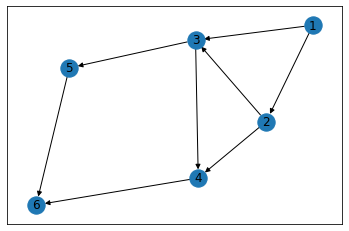

In [35]:
nx.draw_networkx(G_directed)

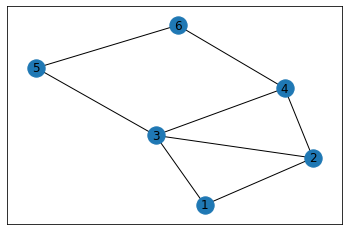

In [36]:
nx.draw_networkx(G_undir)

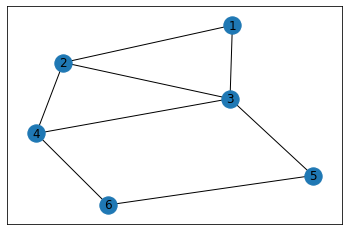

In [60]:
G2 = nx.read_edgelist('graph.txt')
nx.draw_networkx(G2)

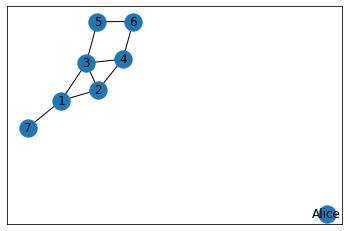

In [61]:
G2.add_edge('1','7')
G2.add_node('Alice')
nx.draw_networkx(G2)

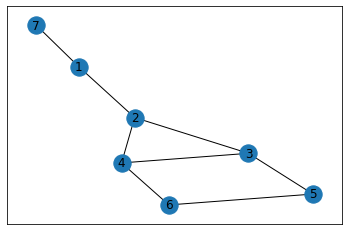

In [62]:
G2.remove_edge('3','1')
G2.remove_node('Alice')

nx.draw_networkx(G2)